In [1]:
from ttem_empymods_functions import *

Function to get a model

In [2]:
HM, LM = load_HM_LM('HighMoment.tem', 'LowMoment.tem')

# number of points in the waveform
nPoints = 45

# get the gates from the high and low moment TEM data
gates = get_gates_new(HM, LM)
    

* WARNING :: Unused **kwargs: {'srcpts': 2}.

:: empymod START  ::  v2.3.0

   depth       [m] :  0.5 30.5 32.5 132.5
   res     [Ohm.m] :  2E+14 100 50 100 400
   aniso       [-] :  1 1 1 1 1
   epermH      [-] :  1 1 1 1 1
   epermV      [-] :  1 1 1 1 1
   mpermH      [-] :  1 1 1 1 1
   mpermV      [-] :  1 1 1 1 1
   direct field    :  Comp. in wavenumber domain
   frequency  [Hz] :  4.96572E-05 - 3.06113E+10 : 246  [min-max; #]
                   :  4.96572E-05 5.70623E-05 6.55717E-05 7.535E-05 8.65865E-05 9.94987E-05 0.000114336 0.000131387 0.00015098 0.000173494 0.000199366 0.000229097 0.000263261 0.000302519 0.000347632 0.000399472 0.000459043 0.000527498 0.00060616 0.000696553 0.000800426 0.000919789 0.00105695 0.00121457 0.00139569 0.00160382 0.00184299 0.00211782 0.00243364 0.00279656 0.00321359 0.00369281 0.0042435 0.00487631 0.00560349 0.0064391 0.00739933 0.00850274 0.00977071 0.0112278 0.0129021 0.0148261 0.017037 0.0195777 0.0224972 0.025852 0.0297072 0.0341372 0.03922

/Users/bart/miniconda3/lib/python3.11/site-packages/scipy/interpolate/_fitpack2.py:739: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


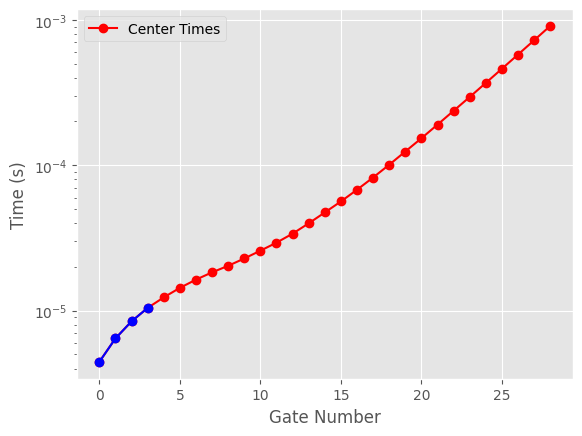

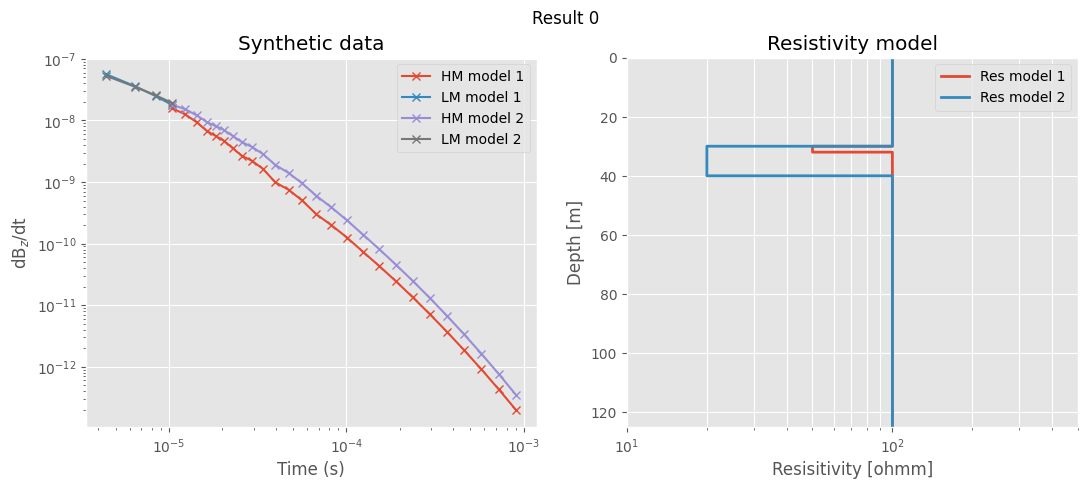

In [3]:
# %%time

resmodel = [[30, 2, 100], [100, 50, 100, 400]]
resmodel2 = [[30, 10, 100], [100, 20, 100, 400]]

path_gates = 'Gates_from_Syn.txt'
path_waveform_HM = 'Waveform_HM.txt'
path_waveform_LM = 'Waveform_LM.txt'

gates = get_gates(path_gates, plot=True)

waveform_data = get_waveform(path_waveform_HM, path_waveform_LM, plot=True)
for i in range(1):
    Data_forw_hm = tTEM_pointsource_test('hm', resmodel, waveform_data, gates)
    Data_forw_lm = tTEM_pointsource_test('lm', resmodel, waveform_data, gates)
    

plt.figure(figsize=(6.4*2, 4.8))
plt.subplot(1,2,1)
plt.suptitle(f'Result {i}')
plt.plot(gates[1], Data_forw_hm[0] , marker ='x', label='HM model 1')
plt.plot(gates[0], Data_forw_lm[0] , marker ='x', label='LM model 1')
plt.xscale('log')
plt.yscale('log')

Data_forw_hm = tTEM_pointsource_test('hm', resmodel2, waveform_data, gates)
Data_forw_lm = tTEM_pointsource_test('lm', resmodel2, waveform_data, gates)

plt.plot(gates[1], Data_forw_hm[0] , marker ='x', label='HM model 2')
plt.plot(gates[0], Data_forw_lm[0] , marker ='x', label='LM model 2') 

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('dB$_z$/dt')
plt.title('Synthetic data')

plt.subplot(1,2,2)
plt.title('Resistivity model')
plot_model(resmodel)
plot_model(resmodel2, label='Res model 2')
plt.legend()

In [4]:
# Initial thickness
thickness = 5
res_layer = 50

path_gates = 'Gates_from_Syn.txt'
path_waveform_HM = 'Waveform_HM.txt'
path_waveform_LM = 'Waveform_LM.txt'

plt.close()

# Loop over 10 different layer thicknesses
for i in range(10):

    # Update thickness
    thickness += 1
    res_layer -= 4

    # Update resmodel with new thickness
    resmodel = [[30, thickness, 100], [100, res_layer, 100, 400]]

    gates = get_gates(path_gates, plot=False)

    waveform_data = get_waveform(path_waveform_HM, path_waveform_LM, plot=False)

    Data_forw_hm = tTEM_pointsource_test('hm', resmodel, waveform_data, gates)
    Data_forw_lm = tTEM_pointsource_test('lm', resmodel, waveform_data, gates)

    plt.figure(figsize=(6.4*2, 4.8))
    plt.subplot(1,2,1)
    plt.suptitle(f'Result {i}')
    plt.plot(gates[1], Data_forw_hm[0] , marker ='x', label='HM')
    plt.plot(gates[0], Data_forw_lm[0] , marker ='x', label='LM')
    plt.xscale('log')
    plt.yscale('log')

    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('dB$_z$/dt')
    plt.title('Synthetic data')

    plt.subplot(1,2,2)
    plt.title('Resistivity model')
    plot_model(resmodel)
    plt.savefig(f'./results/Result_{i}.png')

    plt.close()

* WARNING :: Unused **kwargs: {'srcpts': 2}.

:: empymod START  ::  v2.3.0

   depth       [m] :  0.5 30.5 36.5 136.5
   res     [Ohm.m] :  2E+14 100 46 100 400
   aniso       [-] :  1 1 1 1 1
   epermH      [-] :  1 1 1 1 1
   epermV      [-] :  1 1 1 1 1
   mpermH      [-] :  1 1 1 1 1
   mpermV      [-] :  1 1 1 1 1
   direct field    :  Comp. in wavenumber domain
   frequency  [Hz] :  4.96572E-05 - 3.06113E+10 : 246  [min-max; #]
                   :  4.96572E-05 5.70623E-05 6.55717E-05 7.535E-05 8.65865E-05 9.94987E-05 0.000114336 0.000131387 0.00015098 0.000173494 0.000199366 0.000229097 0.000263261 0.000302519 0.000347632 0.000399472 0.000459043 0.000527498 0.00060616 0.000696553 0.000800426 0.000919789 0.00105695 0.00121457 0.00139569 0.00160382 0.00184299 0.00211782 0.00243364 0.00279656 0.00321359 0.00369281 0.0042435 0.00487631 0.00560349 0.0064391 0.00739933 0.00850274 0.00977071 0.0112278 0.0129021 0.0148261 0.017037 0.0195777 0.0224972 0.025852 0.0297072 0.0341372 0.03922

/Users/bart/miniconda3/lib/python3.11/site-packages/scipy/interpolate/_fitpack2.py:739: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


* WARNING :: Unused **kwargs: {'srcpts': 2}.

:: empymod START  ::  v2.3.0

   depth       [m] :  0.5 30.5 37.5 137.5
   res     [Ohm.m] :  2E+14 100 42 100 400
   aniso       [-] :  1 1 1 1 1
   epermH      [-] :  1 1 1 1 1
   epermV      [-] :  1 1 1 1 1
   mpermH      [-] :  1 1 1 1 1
   mpermV      [-] :  1 1 1 1 1
   direct field    :  Comp. in wavenumber domain
   frequency  [Hz] :  4.96572E-05 - 3.06113E+10 : 246  [min-max; #]
                   :  4.96572E-05 5.70623E-05 6.55717E-05 7.535E-05 8.65865E-05 9.94987E-05 0.000114336 0.000131387 0.00015098 0.000173494 0.000199366 0.000229097 0.000263261 0.000302519 0.000347632 0.000399472 0.000459043 0.000527498 0.00060616 0.000696553 0.000800426 0.000919789 0.00105695 0.00121457 0.00139569 0.00160382 0.00184299 0.00211782 0.00243364 0.00279656 0.00321359 0.00369281 0.0042435 0.00487631 0.00560349 0.0064391 0.00739933 0.00850274 0.00977071 0.0112278 0.0129021 0.0148261 0.017037 0.0195777 0.0224972 0.025852 0.0297072 0.0341372 0.03922

/Users/bart/miniconda3/lib/python3.11/site-packages/scipy/interpolate/_fitpack2.py:739: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


* WARNING :: Unused **kwargs: {'srcpts': 2}.

:: empymod START  ::  v2.3.0

   depth       [m] :  0.5 30.5 38.5 138.5
   res     [Ohm.m] :  2E+14 100 38 100 400
   aniso       [-] :  1 1 1 1 1
   epermH      [-] :  1 1 1 1 1
   epermV      [-] :  1 1 1 1 1
   mpermH      [-] :  1 1 1 1 1
   mpermV      [-] :  1 1 1 1 1
   direct field    :  Comp. in wavenumber domain
   frequency  [Hz] :  4.96572E-05 - 3.06113E+10 : 246  [min-max; #]
                   :  4.96572E-05 5.70623E-05 6.55717E-05 7.535E-05 8.65865E-05 9.94987E-05 0.000114336 0.000131387 0.00015098 0.000173494 0.000199366 0.000229097 0.000263261 0.000302519 0.000347632 0.000399472 0.000459043 0.000527498 0.00060616 0.000696553 0.000800426 0.000919789 0.00105695 0.00121457 0.00139569 0.00160382 0.00184299 0.00211782 0.00243364 0.00279656 0.00321359 0.00369281 0.0042435 0.00487631 0.00560349 0.0064391 0.00739933 0.00850274 0.00977071 0.0112278 0.0129021 0.0148261 0.017037 0.0195777 0.0224972 0.025852 0.0297072 0.0341372 0.03922

/Users/bart/miniconda3/lib/python3.11/site-packages/scipy/interpolate/_fitpack2.py:739: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],
/Users/bart/miniconda3/lib/python3.11/site-packages/scipy/interpolate/_fitpack2.py:739: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],



:: empymod END; runtime = 0:00:00.003837 :: 1 kernel call(s)

* WARNING :: Unused **kwargs: {'srcpts': 2}.

:: empymod START  ::  v2.3.0

   depth       [m] :  0.5 30.5 39.5 139.5
   res     [Ohm.m] :  2E+14 100 34 100 400
   aniso       [-] :  1 1 1 1 1
   epermH      [-] :  1 1 1 1 1
   epermV      [-] :  1 1 1 1 1
   mpermH      [-] :  1 1 1 1 1
   mpermV      [-] :  1 1 1 1 1
   direct field    :  Comp. in wavenumber domain
   frequency  [Hz] :  0.000213694 - 1.14637E+11 : 245  [min-max; #]
                   :  0.000213694 0.00024556 0.000282179 0.000324259 0.000372614 0.00042818 0.000492032 0.000565405 0.000649721 0.00074661 0.000857948 0.000985888 0.00113291 0.00130185 0.00149599 0.00171908 0.00197543 0.00227002 0.00260853 0.00299753 0.00344453 0.00395819 0.00454846 0.00522674 0.00600617 0.00690184 0.00793107 0.00911378 0.0104729 0.0120346 0.0138293 0.0158916 0.0182614 0.0209846 0.0241139 0.0277098 0.0318421 0.0365905 0.042047 0.0483172 0.0555225 0.0638022 0.0733167 0.0842499 0

/Users/bart/miniconda3/lib/python3.11/site-packages/scipy/interpolate/_fitpack2.py:739: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],
/Users/bart/miniconda3/lib/python3.11/site-packages/scipy/interpolate/_fitpack2.py:739: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],



:: empymod END; runtime = 0:00:00.003780 :: 1 kernel call(s)

* WARNING :: Unused **kwargs: {'srcpts': 2}.

:: empymod START  ::  v2.3.0

   depth       [m] :  0.5 30.5 41.5 141.5
   res     [Ohm.m] :  2E+14 100 26 100 400
   aniso       [-] :  1 1 1 1 1
   epermH      [-] :  1 1 1 1 1
   epermV      [-] :  1 1 1 1 1
   mpermH      [-] :  1 1 1 1 1
   mpermV      [-] :  1 1 1 1 1
   direct field    :  Comp. in wavenumber domain
   frequency  [Hz] :  4.96572E-05 - 3.06113E+10 : 246  [min-max; #]
                   :  4.96572E-05 5.70623E-05 6.55717E-05 7.535E-05 8.65865E-05 9.94987E-05 0.000114336 0.000131387 0.00015098 0.000173494 0.000199366 0.000229097 0.000263261 0.000302519 0.000347632 0.000399472 0.000459043 0.000527498 0.00060616 0.000696553 0.000800426 0.000919789 0.00105695 0.00121457 0.00139569 0.00160382 0.00184299 0.00211782 0.00243364 0.00279656 0.00321359 0.00369281 0.0042435 0.00487631 0.00560349 0.0064391 0.00739933 0.00850274 0.00977071 0.0112278 0.0129021 0.0148261 0.

/Users/bart/miniconda3/lib/python3.11/site-packages/scipy/interpolate/_fitpack2.py:739: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],
/Users/bart/miniconda3/lib/python3.11/site-packages/scipy/interpolate/_fitpack2.py:739: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


* WARNING :: Unused **kwargs: {'srcpts': 2}.

:: empymod START  ::  v2.3.0

   depth       [m] :  0.5 30.5 44.5 144.5
   res     [Ohm.m] :  2E+14 100 14 100 400
   aniso       [-] :  1 1 1 1 1
   epermH      [-] :  1 1 1 1 1
   epermV      [-] :  1 1 1 1 1
   mpermH      [-] :  1 1 1 1 1
   mpermV      [-] :  1 1 1 1 1
   direct field    :  Comp. in wavenumber domain
   frequency  [Hz] :  4.96572E-05 - 3.06113E+10 : 246  [min-max; #]
                   :  4.96572E-05 5.70623E-05 6.55717E-05 7.535E-05 8.65865E-05 9.94987E-05 0.000114336 0.000131387 0.00015098 0.000173494 0.000199366 0.000229097 0.000263261 0.000302519 0.000347632 0.000399472 0.000459043 0.000527498 0.00060616 0.000696553 0.000800426 0.000919789 0.00105695 0.00121457 0.00139569 0.00160382 0.00184299 0.00211782 0.00243364 0.00279656 0.00321359 0.00369281 0.0042435 0.00487631 0.00560349 0.0064391 0.00739933 0.00850274 0.00977071 0.0112278 0.0129021 0.0148261 0.017037 0.0195777 0.0224972 0.025852 0.0297072 0.0341372 0.03922

/Users/bart/miniconda3/lib/python3.11/site-packages/scipy/interpolate/_fitpack2.py:739: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],
/Users/bart/miniconda3/lib/python3.11/site-packages/scipy/interpolate/_fitpack2.py:739: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],
